In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

import matplotlib.pyplot as plt

In [2]:
quality=ctrl.Antecedent(np.arange(0,11,1),'quality')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(0,26,1),'tip')


In [3]:
quality.automf(3)
service.automf(3)


In [4]:
tip['low']=fuzz.trimf(tip.universe,[0,0,13])
tip['medium']=fuzz.trimf(tip.universe,[0,13,25])
tip['high']=fuzz.trimf(tip.universe,[13,25,25])


E:\anaconda3\envs\tf\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


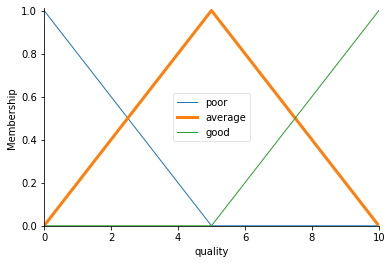

In [5]:
quality['average'].view()

E:\anaconda3\envs\tf\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


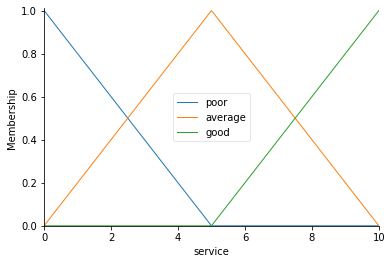

In [6]:
service.view()

In [7]:
#Create Systematic Rules
#Rule1:Poor Quality and Poor Service leads to low tipping
#Rule2:Average Quality and Service leads to Medium Tipping
#Rule3:Good Service and Quality leads to High Tipping

rule1=ctrl.Rule(quality['poor'] & service['poor'],tip['low'])
rule1.view

<bound method Rule.view of IF quality[poor] AND service[poor] THEN tip[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax>

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

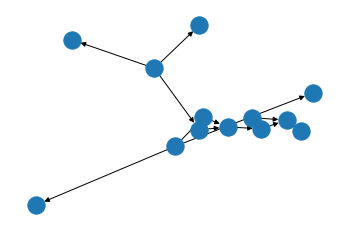

In [8]:
rule2=ctrl.Rule(quality['average'] & service['average'],tip['medium'])
rule2.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

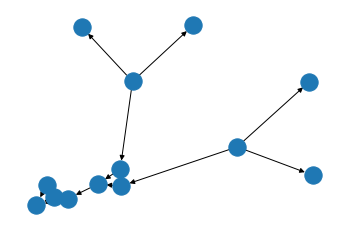

In [9]:
rule3=ctrl.Rule(quality['good'] & service['good'],tip['high'])
rule3.view()

In [10]:
tip_computation=ctrl.ControlSystem([rule1,rule2,rule3])
tipping=ctrl.ControlSystemSimulation(tip_computation)

In [11]:
tipping.input['quality']=9.5
tipping.input['service']=9.8
tipping.compute()

In [12]:
tipping.output['tip']

19.81094101644615

E:\anaconda3\envs\tf\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


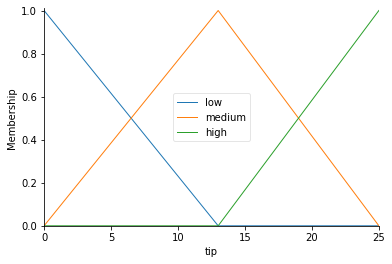

In [13]:
tip.view()

E:\anaconda3\envs\tf\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


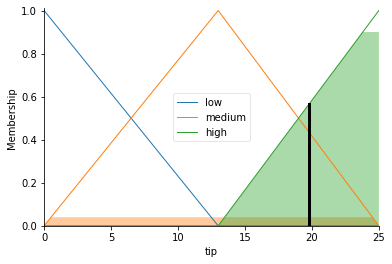

In [14]:
tip.view(sim=tipping)